### 7.3.1 NiN块

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def nin_block(in_channels, out_channnels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channnels, kernel_size, strides, padding), nn.ReLU(),
        nn.Conv2d(out_channnels, out_channnels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channnels, out_channnels, kernel_size=1), nn.ReLU()
    )

### 7.3.2 NiN模型

In [11]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()
)

- AvgPool2d：基于固定 kernel_size 和 stride，结果大小随输入而变.
- AdaptiveAvgPool2d：基于目标输出大小，自动算步幅和窗口，结果大小固定.
- 使用场景：
如果你要固定比例下采样，用 AvgPool2d。
如果你要无论输入多大都输出统一大小，用 AdaptiveAvgPool2d。

In [12]:
X = torch.rand((1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(f'{layer.__class__.__name__}: output shape:\t{X.shape}')

Sequential: output shape:	torch.Size([1, 96, 54, 54])
MaxPool2d: output shape:	torch.Size([1, 96, 26, 26])
Sequential: output shape:	torch.Size([1, 256, 26, 26])
MaxPool2d: output shape:	torch.Size([1, 256, 12, 12])
Sequential: output shape:	torch.Size([1, 384, 12, 12])
MaxPool2d: output shape:	torch.Size([1, 384, 5, 5])
Dropout: output shape:	torch.Size([1, 384, 5, 5])
Sequential: output shape:	torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d: output shape:	torch.Size([1, 10, 1, 1])
Flatten: output shape:	torch.Size([1, 10])


### 7.3.3 训练模型

In [7]:
lr = 0.1
num_epochs = 10
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

training on cuda:0
loss 0.347, train acc 0.872, test acc 0.874
3165.6 examples/sec on cuda:0


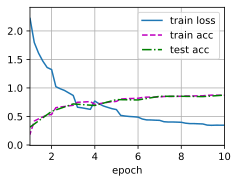

In [8]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())